In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import lab2rgb, rgb2lab
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
# representative RGB colours for each label, for nice display
COLOUR_RGB = {
    'red': (255, 0, 0),
    'orange': (255, 112, 0),
    'yellow': (255, 255, 0),
    'green': (0, 231, 0),
    'blue': (0, 0, 255),
    'purple': (185, 0, 185),
    'brown': (117, 60, 0),
    'pink': (255, 184, 184),
    'black': (0, 0, 0),
    'grey': (150, 150, 150),
    'white': (255, 255, 255),
}
name_to_rgb = np.vectorize(COLOUR_RGB.get, otypes=[np.uint8, np.uint8, np.uint8])

In [3]:
def plot_predictions(model, lum=67, resolution=300):
    """
    Create a slice of LAB colour space with given luminance; predict with the model; plot the results.
    """
    wid = resolution
    hei = resolution
    n_ticks = 5

    # create a hei*wid grid of LAB colour values, with L=lum
    ag = np.linspace(-100, 100, wid)
    bg = np.linspace(-100, 100, hei)
    aa, bb = np.meshgrid(ag, bg)
    ll = lum * np.ones((hei, wid))
    lab_grid = np.stack([ll, aa, bb], axis=2)

    # convert to RGB for consistency with original input
    X_grid = lab2rgb(lab_grid)

    # predict and convert predictions to colours so we can see what's happening
    y_grid = model.predict(X_grid.reshape((-1, 3)))
    pixels = np.stack(name_to_rgb(y_grid), axis=1) / 255
    pixels = pixels.reshape((hei, wid, 3))

    # plot input and predictions
    plt.figure(figsize=(10, 5))
    plt.suptitle('Predictions at L=%g' % (lum,))
    plt.subplot(1, 2, 1)
    plt.title('Inputs')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.ylabel('B')
    plt.imshow(X_grid.reshape((hei, wid, -1)))

    plt.subplot(1, 2, 2)
    plt.title('Predicted Labels')
    plt.xticks(np.linspace(0, wid, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.yticks(np.linspace(0, hei, n_ticks), np.linspace(-100, 100, n_ticks))
    plt.xlabel('A')
    plt.imshow(pixels)


In [4]:
data = pd.read_csv('colour-data.csv')
data

,R,G,B,Label,Confidence
0,168,211,243,blue,good
1,37,32,40,black,perfect
2,35,34,38,black,perfect
3,79,74,159,purple,good
4,55,99,34,green,perfect
...,...,...,...,...,...
4373,75,140,79,green,perfect
4374,83,13,133,purple,perfect
4375,139,169,103,green,perfect
4376,173,34,214,purple,perfect


In [5]:
# extract X values
X = data[['R', 'G', 'B']]/255     # array with shape (n, 3). Divide by 255 so components are all 0-1
# extract y values
y = data['Label']     # array with shape (n,) of colour words
# split x & y values to training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [6]:
X_train, X_valid, y_train, y_valid

(             R         G         B
 2114  0.984314  0.745098  0.960784
 3505  0.556863  0.615686  0.588235
 1450  0.752941  0.933333  0.525490
 1212  0.952941  0.956863  0.941176
 2319  0.611765  0.615686  0.517647
 ...        ...       ...       ...
 2971  0.525490  0.384314  0.286275
 3977  0.407843  0.207843  0.439216
 2718  0.349020  0.168627  0.305882
 4350  0.639216  0.250980  0.101961
 2551  0.525490  0.509804  0.525490
 
 [3283 rows x 3 columns],
              R         G         B
 4082  0.003922  0.611765  0.537255
 3556  0.419608  0.450980  0.717647
 1351  0.541176  0.552941  0.784314
 2691  0.317647  0.054902  0.878431
 467   0.172549  0.960784  0.352941
 ...        ...       ...       ...
 723   0.752941  0.090196  0.152941
 2056  0.698039  0.780392  0.262745
 4147  0.913725  0.247059  0.823529
 2566  0.780392  0.023529  0.176471
 1139  0.568627  0.650980  0.615686
 
 [1095 rows x 3 columns],
 2114      pink
 3505      grey
 1450     green
 1212     white
 2319      grey


In [7]:
# TODO: build model_rgb to predict y from X.
# create a naïve Bayes classifier and train it
model_rgb = GaussianNB()
model_rgb.fit(X_train, y_train)

GaussianNB()

In [8]:
# TODO: print model_rgb's accuracy score
# print model's accuracy_score
print(model_rgb.score(X_valid, y_valid))


0.5488584474885845


In [16]:
# TODO: build model_lab to predict y from X by converting to LAB colour first.
# use pipeline for model
model_lab = make_pipeline(
    FunctionTransformer(rgb2lab, validate=True),
    GaussianNB()
)
model_lab.fit(X_train, y_train)

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function rgb2lab at 0x7f9c3ab0c3a0>,
                                     validate=True)),
                ('gaussiannb', GaussianNB())])

In [17]:
# TODO: print model_lab's accuracy score
# print model's accuracy_score
print(model_lab.score(X_valid, y_valid))

0.6164383561643836


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


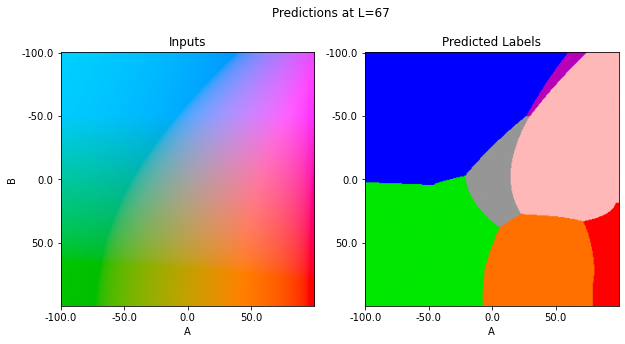

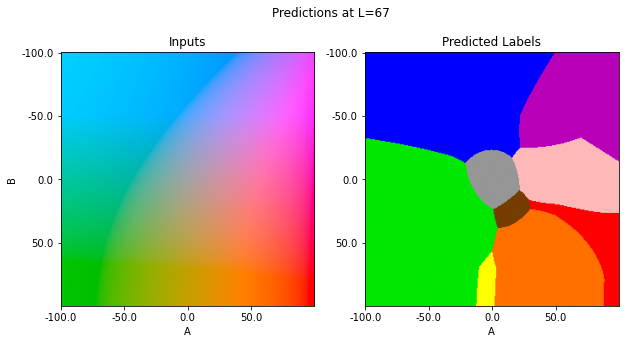

In [12]:
# call plot_predictions for both models
plot_predictions(model_rgb)
plt.savefig('predictions_rgb.png')
plot_predictions(model_lab)
plt.savefig('predictions_lab.png')

In [ ]:
    X = data # array with shape (n, 3). Divide by 255 so components are all 0-1.
    y = data # array with shape (n,) of colour words.

    # TODO: build model_rgb to predict y from X.
    # TODO: print model_rgb's accuracy score

    # TODO: build model_lab to predict y from X by converting to LAB colour first.
    # TODO: print model_lab's accuracy score

    plot_predictions(model_rgb)
    plt.savefig('predictions_rgb.png')
    plot_predictions(model_lab)
    plt.savefig('predictions_lab.png')